<a href="https://colab.research.google.com/github/corentin-pujol/q-Obesity-types-prediction/blob/main/Obesity_levels_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projet de Quentin PELET & Corentin PUJOL

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/corentin-pujol/q-Obesity-types-prediction/main/ObesityDataSet_raw_and_data_sinthetic.csv?token=ARAXAQNO5CAXVY42PPGXL33BXULRQ"
df = pd.read_csv(url)
df.dropna(inplace=True)
df_copy=pd.read_csv(url)
df_copy.dropna(inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
col_names = ["Gender", "Age", "Height", "Weight", "Family_overweight", "FAVC", "FCVC", "NCP", "CAEC", "Smoke", "CH2O", "SCC", "FAF", "TUE", "CALC", "Transportation", "Obesity_level_category"]
df.columns = col_names

Columns names description :

FAVC -> Frequent consumption of high caloric food 

FCVC -> Frequency of consumption of vegetables

NCP -> Number of main daily meals

CAEC -> Consumption of food between meals

CH2O -> Consumption of water daily

SCC -> Does the person count how many calories he consums daily

FAF -> Physical usual activity 

TUE -> How many times the person spends on a screen daily

CALC -> Usual alcohol consumption




Now, we are going to tranform all the qualitative variables as quantitative variables (Gender, Family overweight, FAVC, CAEC, Smoke, SCC, CALC, Transportation, Obesity level category)

Age : We truncate the values to the unit

And for the other variables, we decided to round the values because we thought that it didn't make sense to have six or seven numbers after the comma.

In [ ]:
df["Gender"] = df["Gender"].apply(lambda x : 1 if x=="Female" else 0)
df["Age"] = df["Age"].apply(lambda x : int(float(int(x*100))/100))
df["Height"] = df["Height"].apply(lambda x : round(x,2))
df["Weight"] = df["Weight"].apply(lambda x : round(x,1))
df["Family_overweight"] = df["Family_overweight"].apply(lambda x : 1 if x=="yes" else 0)
df["FAVC"] = df["FAVC"].apply(lambda x : 1 if x=="yes" else 0)
df["FCVC"] = df["FCVC"].apply(lambda x : int(round(x,0)))
df["NCP"] = df["NCP"].apply(lambda x : int(round(x,0)))
df["CAEC"], unique_CAEC = pd.factorize(df["CAEC"], sort=True)
df["Smoke"] = df["Smoke"].apply(lambda x : 1 if x=="yes" else 0)
df["CH2O"] = df["CH2O"].apply(lambda x : round(x,1))
df["SCC"] = df["SCC"].apply(lambda x : 1 if x=="yes" else 0)
df["FAF"] = df["FAF"].apply(lambda x : int(round(x,0)))
df["TUE"] = df["TUE"].apply(lambda x : round(x,2))
df["CALC"], unique_CALC = pd.factorize(df["CALC"], sort=True)
df["Transportation"], unique_Transportation = pd.factorize(df["Transportation"], sort=True)

df

,Gender,Age,Height,Weight,Family_overweight,FAVC,FCVC,NCP,CAEC,Smoke,CH2O,SCC,FAF,TUE,CALC,Transportation,Obesity_level_category
0,1,21,1.62,64.0,1,0,2,3,2,0,2.0,0,0,1.00,3,3,Normal_Weight
1,1,21,1.52,56.0,1,0,3,3,2,1,3.0,1,3,0.00,2,3,Normal_Weight
2,0,23,1.80,77.0,1,0,2,3,2,0,2.0,0,2,1.00,1,3,Normal_Weight
3,0,27,1.80,87.0,0,0,3,3,2,0,2.0,0,2,0.00,1,4,Overweight_Level_I
4,0,22,1.78,89.8,0,0,2,1,2,0,2.0,0,0,0.00,2,3,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.4,1,1,3,3,2,0,1.7,0,2,0.91,2,3,Obesity_Type_III
2107,1,21,1.75,133.7,1,1,3,3,2,0,2.0,0,1,0.60,2,3,Obesity_Type_III
2108,1,22,1.75,133.7,1,1,3,3,2,0,2.1,0,1,0.65,2,3,Obesity_Type_III
2109,1,24,1.74,133.3,1,1,3,3,2,0,2.9,0,1,0.59,2,3,Obesity_Type_III


In [ ]:
obesity_level ={"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}

df["Obesity_level_category"] = df["Obesity_level_category"].map(obesity_level,na_action='ignore').apply(lambda x : int(x))

df

,Gender,Age,Height,Weight,Family_overweight,FAVC,FCVC,NCP,CAEC,Smoke,CH2O,SCC,FAF,TUE,CALC,Transportation,Obesity_level_category
0,1,21,1.62,64.0,1,0,2,3,2,0,2.0,0,0,1.00,3,3,1
1,1,21,1.52,56.0,1,0,3,3,2,1,3.0,1,3,0.00,2,3,1
2,0,23,1.80,77.0,1,0,2,3,2,0,2.0,0,2,1.00,1,3,1
3,0,27,1.80,87.0,0,0,3,3,2,0,2.0,0,2,0.00,1,4,2
4,0,22,1.78,89.8,0,0,2,1,2,0,2.0,0,0,0.00,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.4,1,1,3,3,2,0,1.7,0,2,0.91,2,3,6
2107,1,21,1.75,133.7,1,1,3,3,2,0,2.0,0,1,0.60,2,3,6
2108,1,22,1.75,133.7,1,1,3,3,2,0,2.1,0,1,0.65,2,3,6
2109,1,24,1.74,133.3,1,1,3,3,2,0,2.9,0,1,0.59,2,3,6


#Visualization of the data and correlation

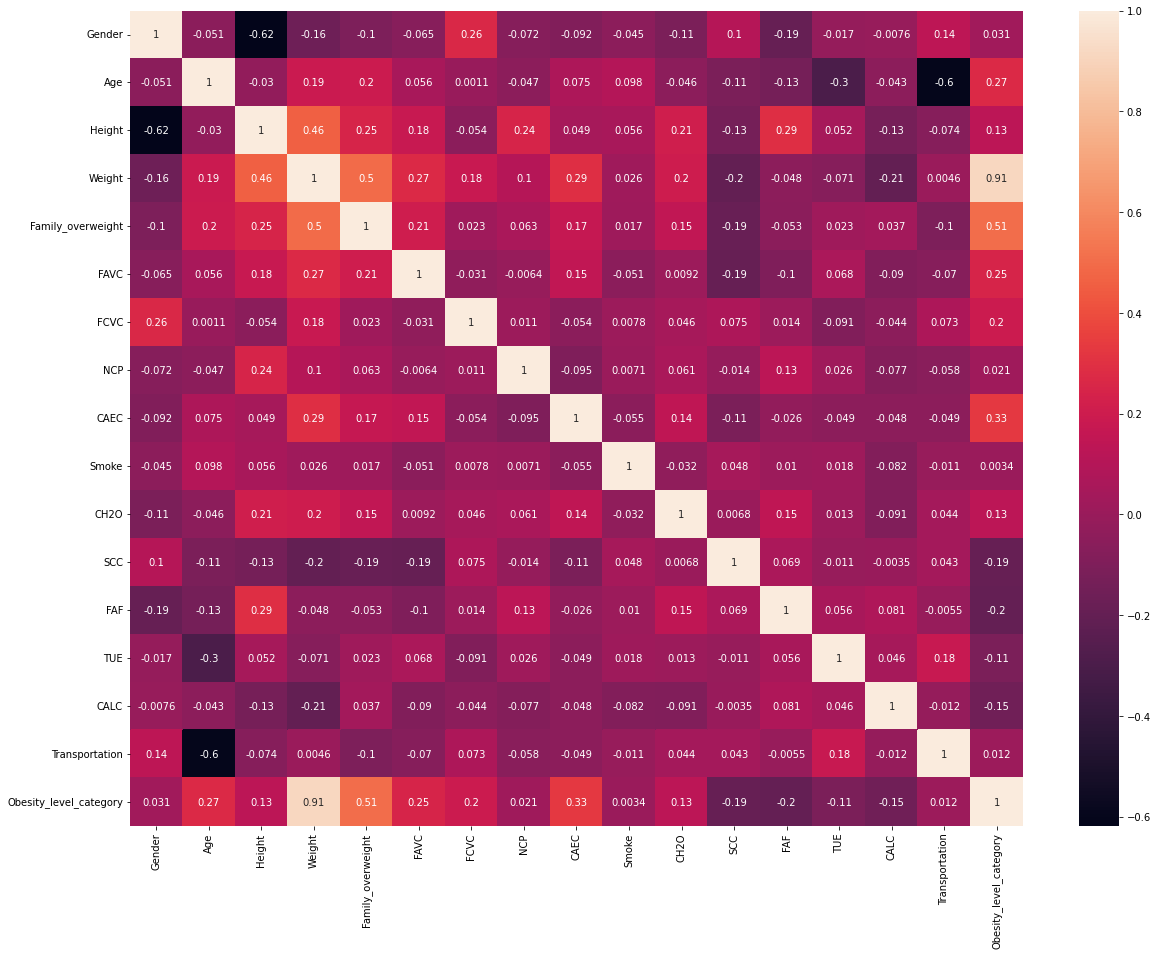

In [ ]:
corr_df = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

On remarque que la variable Weight est hautement correlée avec le niveau d'obesité, ce qui est logique puisque le poids est tres determinant pour determiner le niveau d'obesité

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6fbfb0d50>,
      dtype=object)

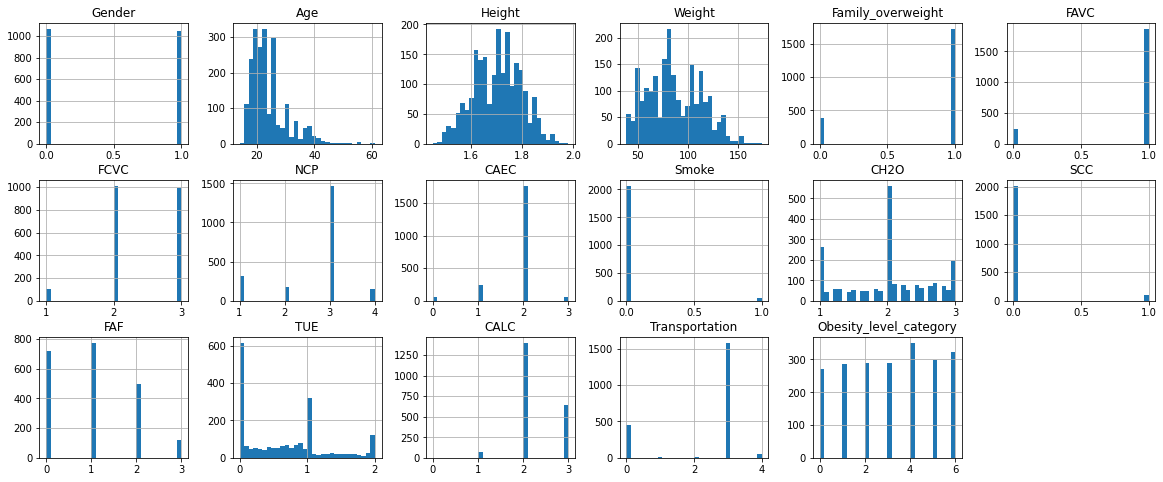

In [ ]:
df[col_names].hist(bins=30, figsize=(20, 8), layout=(3, 6))

Bien que la courbe de l'âge nous montre que l'echantillon est assez jeune, nous constatons qu'il y a autant d'hommes et de femmes de taille et de poids differents. L'echantillon est bien representatif d'une population réelle.

De plus il y a une repartition homogene des differentes categories d'obesité

In [ ]:
df.groupby("Smoke").count()["Gender"]

Smoke
0    2067
1      44
Name: Gender, dtype: int64

2% de notre echantillon est fumeur, ce qui n'est pas representatif du nombre de personnes fumant en Amerique du Sud. Par exemple, 16% de la population adulte est fumeuse au Mexique.

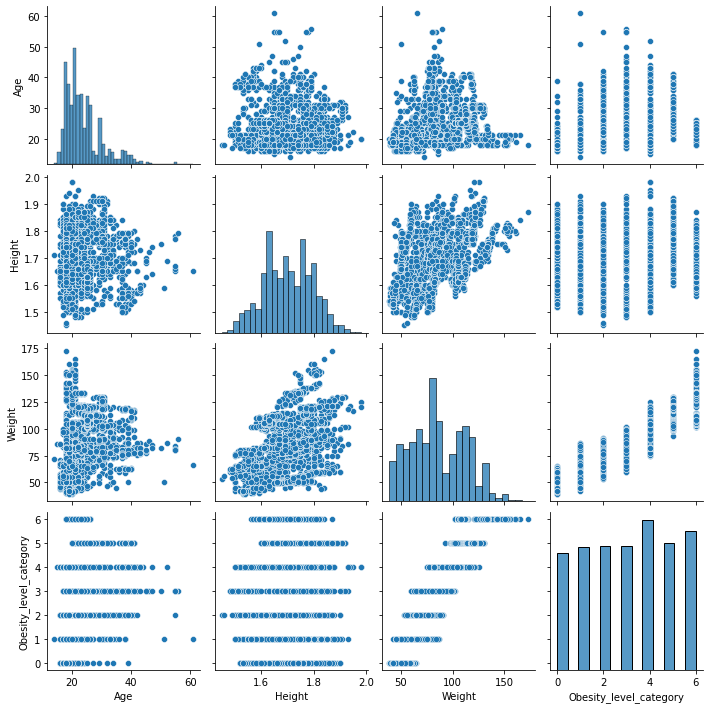

In [ ]:
sns.pairplot(df[["Age","Height","Weight","Obesity_level_category"]])

On observe que plus le poids d'une personne augmente, plus il a un niveau d'obesité imporant. 
De plus la taille n'influe pas sur le niveau d'obesité

Cela confirme donc que l'IMC, pour determiner le niveau d'obesité, est calculé à partir du poids d'une personne

Pour permettre aux modèles de plus tenir compte des autres variables, nous avons décider de retirer la variable Weight du dataframe

**PS : comparer les accuracy des modeles avec Weight et sans Weight**

In [ ]:
df.drop(['Weight'],axis = 1, inplace = True)
df

,Gender,Age,Height,Family_overweight,FAVC,FCVC,NCP,CAEC,Smoke,CH2O,SCC,FAF,TUE,CALC,Transportation,Obesity_level_category
0,1,21,1.62,1,0,2,3,2,0,2.0,0,0,1.00,3,3,1
1,1,21,1.52,1,0,3,3,2,1,3.0,1,3,0.00,2,3,1
2,0,23,1.80,1,0,2,3,2,0,2.0,0,2,1.00,1,3,1
3,0,27,1.80,0,0,3,3,2,0,2.0,0,2,0.00,1,4,2
4,0,22,1.78,0,0,2,1,2,0,2.0,0,0,0.00,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,1,1,3,3,2,0,1.7,0,2,0.91,2,3,6
2107,1,21,1.75,1,1,3,3,2,0,2.0,0,1,0.60,2,3,6
2108,1,22,1.75,1,1,3,3,2,0,2.1,0,1,0.65,2,3,6
2109,1,24,1.74,1,1,3,3,2,0,2.9,0,1,0.59,2,3,6


# Machine Learning

x:variables de predictions
y:target variable

In [ ]:
x=df.loc[:,df.columns!="Obesity_level_category"]
y=df.loc[:,df.columns=="Obesity_level_category"]

Scale des données

In [ ]:
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

Split en train_set et en test_set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1414, 15)
(697, 15)
(1414, 1)
(697, 1)


1. KNN
2. SVM
3. Boosting
4. Random Forest
5. Logistic Regression 
6. LDA/QDA




#Linear Discriminant Analysis

We want to predict firstly if someone is considerated as "obese" or not

In [ ]:
df['Obesity_level_category']=np.where(df['Obesity_level_category']>=4,1,0)

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda_model.fit(x_train, y_train).transform(x_train)
lda_model.explained_variance_ratio_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.45748992, 0.38612571])

In [ ]:
df['Obesity_level_category'].values

array([0, 0, 0, ..., 1, 1, 1])